# Packaging your code

## Installing Libraries

We've seen that there are lots of python libraries. But how do we install them?

The main problem is this: *libraries need other libraries*

So you can't just install a library by copying code to the computer: you'll find yourself wandering down a tree
of "dependencies"; libraries needed by libraries needed by the library you want.

This is actually a good thing; it means that people are making use of each others'
code. There's a real problem in scientific programming, of people who think they're really clever writing their own
twenty-fifth version of the same thing.

So using other people's libraries is good.

Why don't we do it more? Because it can often be quite difficult to **install** other peoples' libraries!

Python has developed a good tool for avoiding this: **pip**.

### Installing Sci-kit learn using Pip

On a computer you control, on which you have installed python via Anaconda, you will need to open a **terminal**
to invoke the library-installer program, `pip`.

* On windows, go to start->all programs->Anaconda->Anaconda Command Prompt
* On mac, start *terminal*. 
* On linux, open a bash shell.

Into this shell, type:
    
`pip install scikit-learn`

The computer will install the package automatically from PyPI. 

Now, close the Jupyter notebook if you have it open, and reopen it. Check your new library is installed with:

In [1]:
from sklearn import datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

([], [])

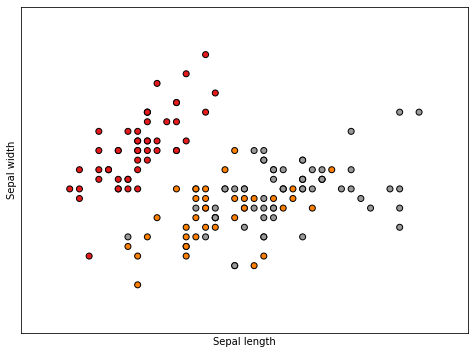

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt

# example from: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

That was actually pretty easy, I hope. This is how you'll install new libraries when you need them.

Troubleshooting:
    
On mac or linux, you *might* get a complaint that you need "superuser", "root", or "administrator" access. If so type:

* `sudo pip install scikit-learn`

and enter your password.
    
If you get a complaint like: 'pip is not recognized as an internal or external command', try the following:
        
* `conda install pip` (Windows)
* `sudo easy_install pip` (Mac, Linux)

Ask me over email if you run into trouble.

### Installing binary dependencies with Conda

`pip` is the usual Python tool for installing libraries. But there's one area of library installation that is still awkward:
some python libraries depend not on other **python** libraries, but on libraries in C++ or Fortran.

This can cause you to run into difficulties installing some libraries. 
Fortunately, for lots of these, Continuum, the makers of Anaconda, provide a carefully managed set of scripts for installing
these awkward non-python libraries too. You can do this with the `conda` command line tool, if you're using Anaconda.

Simply type

* `conda install <whatever>`

instead of `pip install`. This will fetch the python package not from PyPI, but from Anaconda's distribution for your platform, and manage any non-python dependencies too.

Typically, if you're using Anaconda, whenever you come across a python package you want, you should check if Anaconda
package it first using this list: http://docs.continuum.io/anaconda/pkg-docs.html. (Or just by trying `conda install` and hoping!) If you can `conda install` it, you'll likely have less problems. But Continuum don't package everything, so you'll need to `pip install` from time to time.

### Where do these libraries go? 

In [3]:
import numpy

numpy.__path__

['/opt/hostedtoolcache/Python/3.7.12/x64/lib/python3.7/site-packages/numpy']

Your computer will be configured to keep installed Python packages in a particular place.

Python knows where to look for possible library installations in a list of places, called the "PythonPath".
It will try each of these places in turn, until it finds a matching library name.

In [4]:
import sys

sys.path  # Just list the last few

['/home/runner/work/rsd-engineeringcourse/rsd-engineeringcourse/module06_software_projects',
 '/opt/hostedtoolcache/Python/3.7.12/x64/lib/python37.zip',
 '/opt/hostedtoolcache/Python/3.7.12/x64/lib/python3.7',
 '/opt/hostedtoolcache/Python/3.7.12/x64/lib/python3.7/lib-dynload',
 '',
 '/opt/hostedtoolcache/Python/3.7.12/x64/lib/python3.7/site-packages',
 '/opt/hostedtoolcache/Python/3.7.12/x64/lib/python3.7/site-packages/IPython/extensions',
 '/home/runner/.ipython']

### Libraries not in PyPI

Sometimes, such as for the Animation library in the Boids example, you'll need to download the source code
directly. This won't automatically follow the dependency tree, but for simple standalone libraries, is sometimes necessary.

To install these on windows, download and unzip the library into a folder of your choice, e.g. `my_python_libs`. 

On windows, a reasonable choice
is the folder you end up in when you open the Anaconda terminal. You can get a graphical view on this folder by typing: `explorer .`

Make a new folder for your download and unzip the library there.

Now, you need to move so you're inside your download in the terminal:

* `cd my_python_libs`
* `cd <library name>` (e.g. `cd JSAnimation-master`) 

Now, manually install the library in your PythonPath using pip:

* `pip install .`

This is all pretty awkward, but it is worth practicing this stuff, as most of the power of using programming for
research resides in all the libraries that are out there. 